In [146]:
import math
import warnings
import statsmodels.formula.api as smf

from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [147]:
fname = 'ForRod_FBIExcel.csv'
df = pd.read_csv(fname)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [148]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [149]:
df['Robbery_New'] = np.where(df['Robbery'] >0, 1,0)

In [150]:
df['Murmaider'] = np.where(df['Murder and\nnonnegligent\nmanslaughter'] >0, 1, 0)

In [151]:
df['Population_Dos'] = df['Population'] * df['Population'] 

In [152]:
df = df[df['Population_Dos'] < 8000000]

In [153]:
df = df[df['Population'] < 8000000]

In [154]:
df['PropertyCrime'] = df['Property\ncrime']

In [155]:
x = df[['Robbery_New', 'Murmaider', 'Population_Dos', 'Population']]
y = df['Property\ncrime']

Coefficients: 
 [ 4.08256959e+01 -1.01007778e-09  8.66540703e-08  1.68103040e-02]
Intercept: 
 -7.472058081429278


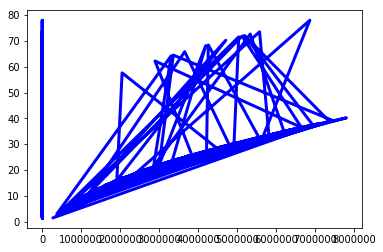

In [156]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
# plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

In [157]:
len(x) == len(y)

True

Coefficients: 
 [ 4.08256959e+01 -1.01007778e-09  8.66540703e-08  1.68103040e-02]
Intercept: 
 -7.472058081429278


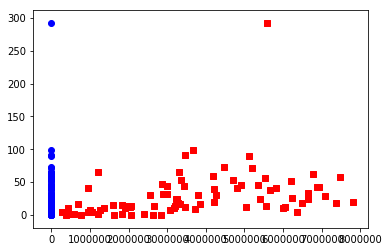

In [158]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs

#plt.plot(x, regr.predict(x), color='blue', linewidth=3)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x['Population_Dos'], y, c = 'r', marker = 's')
ax1.scatter(x['Population'], y, c = 'b', marker = 'o')
plt.show()

# t = np.arange(0., 5., 0.2)
# plt.plot(t,t,r--', t, t**2, 'bs', t, t**3, 'g^')

Coefficients: 
 [ 4.08256959e+01 -1.01007778e-09  8.66540703e-08  1.68103040e-02]
Intercept: 
 -7.472058081429278


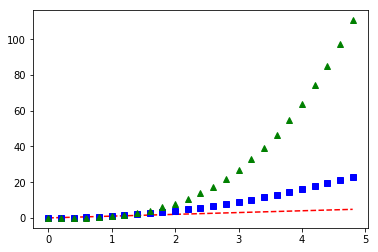

In [159]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs

#plt.plot(x, regr.predict(x), color='blue', linewidth=3)
t = np.arange(0., 5., 0.2)
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

In [160]:
x['Population']

0      1861
1      2577
6      1781
10     2053
12      658
13     2522
23     1410
25     1022
26     2325
27     2054
28     2065
29     2358
34     1174
37     1854
38     2219
42     2246
44      762
48      980
50     2732
51     1835
52     1733
58     2049
63     1827
75     1628
77     1122
79     2191
80     1913
87     1104
103    2265
105    2579
       ... 
231    2171
238    1385
242    1433
244    2116
251    2550
252    2460
256    1274
258    1602
260     997
265    2354
266     977
268    1947
270    2635
278    2279
280    2715
287     872
289    2362
292    2412
293    1351
295    1437
297    2450
299    1805
307    1691
316    1820
319     615
332    1862
335    1797
337    1732
339    2604
344     829
Name: Population, Length: 82, dtype: int64

In [161]:
t**3

array([0.00000e+00, 8.00000e-03, 6.40000e-02, 2.16000e-01, 5.12000e-01,
       1.00000e+00, 1.72800e+00, 2.74400e+00, 4.09600e+00, 5.83200e+00,
       8.00000e+00, 1.06480e+01, 1.38240e+01, 1.75760e+01, 2.19520e+01,
       2.70000e+01, 3.27680e+01, 3.93040e+01, 4.66560e+01, 5.48720e+01,
       6.40000e+01, 7.40880e+01, 8.51840e+01, 9.73360e+01, 1.10592e+02])

In [162]:
del df['Rape\n(revised\ndefinition)1']

In [163]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Robbery_New,Murmaider,Population_Dos,PropertyCrime
count,82.000,82.000,82.000,82.000,82.000,82.000,82.000,82.000,82.000,82.000,64.000,82.000,82.000,82.000,82.000
mean,1821.000,1.720,0.000,0.061,0.207,1.451,30.427,4.939,24.707,0.780,0.062,0.171,0.000,3659182.537,30.427
std,589.388,2.213,0.000,0.287,0.515,2.091,37.564,6.799,31.128,1.432,0.244,0.379,0.000,2057025.293,37.564
min,526.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,276676.000,0.000
25%,1414.500,0.000,0.000,0.000,0.000,0.000,10.000,1.000,8.000,0.000,0.000,0.000,0.000,2000871.000,10.000
50%,1831.000,1.000,0.000,0.000,0.000,1.000,19.500,3.000,14.500,0.000,0.000,0.000,0.000,3352577.000,19.500
75%,2321.500,3.000,0.000,0.000,0.000,2.000,42.000,6.000,34.750,1.000,0.000,0.000,0.000,5389399.000,42.000
max,2794.000,12.000,0.000,2.000,3.000,11.000,292.000,49.000,238.000,10.000,1.000,1.000,0.000,7806436.000,292.000


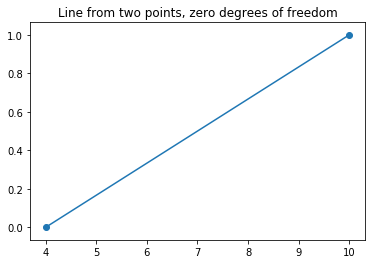

In [164]:
y = [0, 1]
x = [4, 10]
plt.scatter(x, y)
plt.plot(x, y)
plt.title("Line from two points, zero degrees of freedom")
plt.show()

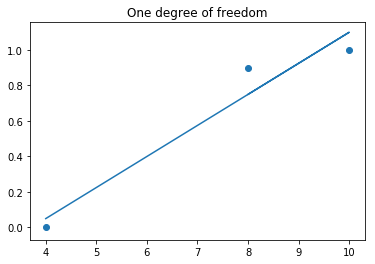

In [165]:
y=[0, 1, .9]
x=[4, 10, 8]
plt.scatter(x, y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x))
plt.title("One degree of freedom")
plt.show()

In [176]:
import statsmodels.formula.api as smf

data = df

# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'PropertyCrime ~ Robbery_New+Murmaider+Population_Dos'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data, missing = 'drop').fit()

In [177]:
lm.params

Intercept         5.734
Robbery_New      41.788
Murmaider         0.000
Population_Dos    0.000
dtype: float64

In [182]:
lm.pvalues.round(20)

Intercept        0.435
Robbery_New      0.000
Murmaider          nan
Population_Dos   0.008
dtype: float64

In [183]:
lm.summary()

c:\users\rjourney\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          PropertyCrime   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     15.58
Date:                Tue, 02 Apr 2019   Prob (F-statistic):           1.98e-06
Time:                        19:30:57   Log-Likelihood:                -399.55
No. Observations:                  82   AIC:                             805.1
Df Residuals:                      79   BIC:                             812.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.7344      7.315      0.784      0.435      -8.826      20.295
Robbery_New       41.7879      9.584      4.360      0.000      22.710      60.865
Murmaider               0          0        nan        nan           0           0
Population_Dos  4.798e-06   1.76e-06      2.720      0.008    1.29e-06    8.31e-06
==============================================================================
Omnibus:                      106.483   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2398.052
Skew:                           4.046   Prob(JB):                         0.00
Kurtosis:                      28.227   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [179]:
df[['Murder and\nnonnegligent\nmanslaughter', 'Murmaider']].describe()

,Murder and nonnegligent manslaughter,Murmaider
count,82.000,82.000
mean,0.000,0.000
std,0.000,0.000
min,0.000,0.000
25%,0.000,0.000
50%,0.000,0.000
75%,0.000,0.000
max,0.000,0.000


In [170]:
lm.rsquared

0.28288327663530877

In [172]:
from math import sqrt

In [192]:
x = df[['Robbery_New', 'Murmaider', 'Population_Dos', 'Population']]

x = np.sqrt(x)

In [193]:
x

,Robbery_New,Murmaider,Population_Dos,Population
0,0.000,0.000,1861.000,43.139
1,0.000,0.000,2577.000,50.764
6,0.000,0.000,1781.000,42.202
10,0.000,0.000,2053.000,45.310
12,0.000,0.000,658.000,25.652
13,0.000,0.000,2522.000,50.220
23,0.000,0.000,1410.000,37.550
25,0.000,0.000,1022.000,31.969
26,0.000,0.000,2325.000,48.218
27,0.000,0.000,2054.000,45.321


Coefficients: 
 [ 4.09961521e+01 -2.11804185e-12  2.57253453e-02 -6.89738074e-01]
Intercept: 
 5.571851866001488


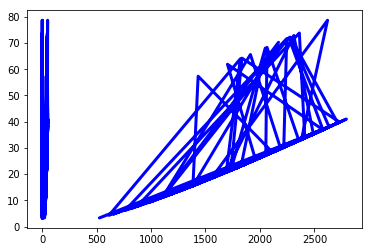

In [194]:
y = df['Property\ncrime']

# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
# plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

In [195]:
x.head()

,Robbery_New,Murmaider,Population_Dos,Population
0,0.000,0.000,1861.000,43.139
1,0.000,0.000,2577.000,50.764
6,0.000,0.000,1781.000,42.202
10,0.000,0.000,2053.000,45.310
12,0.000,0.000,658.000,25.652


In [143]:
#Submit write up regarding the changes in data